In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from citipy import citipy

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:

lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

596

## Perform API Calls

In [6]:
api_key = "924783bda048569443e49dd6a03e5591"

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

city_data = []

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = url + "&q=" + city
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    record_count += 1

    try:
        
        city_weather = requests.get(city_url).json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("data not found -> Skip...")
        pass
               

Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | ahipara
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | damaturu
Processing Record 7 of Set 1 | sorong
Processing Record 8 of Set 1 | vanimo
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | cockburn town
Processing Record 18 of Set 1 | fukue
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | kamina
Processing Record 21 of Set 1 | taolanaro
data not found -> Skip...
Processing Record 22 of Set 1 | thompson
Processing Record 23 of Set 1 | kununurra
Processing Record 24 of Set 1 | illoqq

Processing Record 43 of Set 4 | aguas vermelhas
Processing Record 44 of Set 4 | saldanha
Processing Record 45 of Set 4 | biak
Processing Record 46 of Set 4 | cheremushskiy
Processing Record 47 of Set 4 | benghazi
Processing Record 48 of Set 4 | guerrero negro
Processing Record 49 of Set 4 | adrar
Processing Record 0 of Set 5 | bushehr
Processing Record 1 of Set 5 | beira
Processing Record 2 of Set 5 | acarau
data not found -> Skip...
Processing Record 3 of Set 5 | severo-kurilsk
Processing Record 4 of Set 5 | leningradskiy
Processing Record 5 of Set 5 | rio gallegos
Processing Record 6 of Set 5 | vallenar
Processing Record 7 of Set 5 | tsihombe
data not found -> Skip...
Processing Record 8 of Set 5 | portland
Processing Record 9 of Set 5 | vila velha
Processing Record 10 of Set 5 | hemsedal
Processing Record 11 of Set 5 | asyut
Processing Record 12 of Set 5 | torbay
Processing Record 13 of Set 5 | tigzirt
Processing Record 14 of Set 5 | santa isabel
Processing Record 15 of Set 5 | sala

Processing Record 36 of Set 8 | trelew
Processing Record 37 of Set 8 | krasnaya polyana
Processing Record 38 of Set 8 | bolobo
Processing Record 39 of Set 8 | benguela
Processing Record 40 of Set 8 | puri
Processing Record 41 of Set 8 | rodrigues alves
Processing Record 42 of Set 8 | oistins
Processing Record 43 of Set 8 | alofi
Processing Record 44 of Set 8 | auki
Processing Record 45 of Set 8 | fort nelson
Processing Record 46 of Set 8 | hrubieszow
Processing Record 47 of Set 8 | sortland
Processing Record 48 of Set 8 | zhengjiatun
Processing Record 49 of Set 8 | kavieng
Processing Record 0 of Set 9 | sorland
Processing Record 1 of Set 9 | vestmannaeyjar
Processing Record 2 of Set 9 | puerto del rosario
Processing Record 3 of Set 9 | deputatskiy
Processing Record 4 of Set 9 | altay
Processing Record 5 of Set 9 | najran
Processing Record 6 of Set 9 | farafangana
Processing Record 7 of Set 9 | ulaangom
Processing Record 8 of Set 9 | coquimbo
Processing Record 9 of Set 9 | hami
Processi

Processing Record 34 of Set 12 | burkhala
data not found -> Skip...
Processing Record 35 of Set 12 | guarapari
Processing Record 36 of Set 12 | umm lajj
Processing Record 37 of Set 12 | kadnikov
Processing Record 38 of Set 12 | treinta y tres
Processing Record 39 of Set 12 | bridlington
Processing Record 40 of Set 12 | henties bay
Processing Record 41 of Set 12 | lamesa
Processing Record 42 of Set 12 | codrington
Processing Record 43 of Set 12 | hachinohe
Processing Record 44 of Set 12 | balimo
data not found -> Skip...
Processing Record 45 of Set 12 | takoradi


In [7]:
city_data_pd = pd.DataFrame(city_data)

lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

city_data_pd.to_csv(output_data_file, index_label="City_ID")

city_data_pd.count()

City          539
Cloudiness    539
Country       539
Date          539
Humidity      539
Lat           539
Lng           539
Max Temp      539
Wind Speed    539
dtype: int64

In [8]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-philippe,90,CA,1538537640,93,45.36,-73.48,53.06,11.41
1,yellowknife,75,CA,1538536500,73,62.45,-114.38,26.60,14.99
2,punta arenas,20,CL,1538535600,80,-53.16,-70.91,39.20,17.22
3,ahipara,92,NZ,1538538861,78,-35.17,173.16,62.45,0.49
4,busselton,48,AU,1538538861,94,-33.64,115.35,63.44,20.51


## Latitude vs Temperature Plot

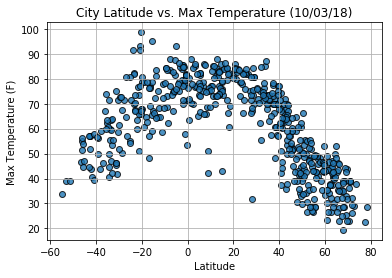

In [9]:
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Max_Temp.png")

plt.show()

## Latitude vs. Humidity Plot

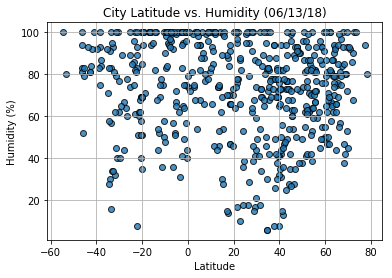

In [7]:
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

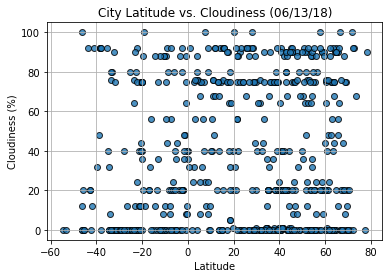

In [8]:
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

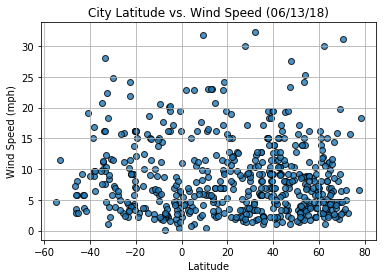

In [9]:
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Wind_Speed.png")

plt.show()